In [1075]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import json

In [1076]:
regular = pd.read_csv('mm25-data/MRegularSeasonDetailedResults.csv')
tourney = pd.read_csv('mm25-data/MNCAATourneyDetailedResults.csv')
massey = pd.read_csv('mm25-data/MMasseyOrdinals.csv')
teams = pd.read_csv('mm25-data/MTeams.csv')
cities = pd.read_csv('mm25-data/Cities.csv')
seeds = pd.read_csv('mm25-data/MNCAATourneySeeds.csv')
seasons = pd.read_csv('mm25-data/MSeasons.csv')
stats = pd.read_csv('mm25-data/MarchMadnessALL.csv')

In [1077]:
display(regular.head())
display(tourney.head())
display(massey.head())
display(teams.head())
display(cities.head())
display(seeds.head())
display(seasons.head())
display(stats.head())

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Christian,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index,Top 12 in AP Top 25 During Week 6?
0,2025,ACC,66.1,253,66.6,259,129.0,2,125.4,1,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes
1,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,1,Midwest,March Madness,1,Yes
2,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,1,West,March Madness,1,Yes
3,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,March Madness,1,Yes
4,2025,SEC,68.1,134,69.3,110,129.9,1,122.3,2,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes


In [1078]:
display(regular.info())
display(tourney.info())
display(massey.info())
display(teams.info())
display(cities.info())
display(seeds.info())
display(seasons.info())
display(stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118449 entries, 0 to 118448
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   118449 non-null  int64 
 1   DayNum   118449 non-null  int64 
 2   WTeamID  118449 non-null  int64 
 3   WScore   118449 non-null  int64 
 4   LTeamID  118449 non-null  int64 
 5   LScore   118449 non-null  int64 
 6   WLoc     118449 non-null  object
 7   NumOT    118449 non-null  int64 
 8   WFGM     118449 non-null  int64 
 9   WFGA     118449 non-null  int64 
 10  WFGM3    118449 non-null  int64 
 11  WFGA3    118449 non-null  int64 
 12  WFTM     118449 non-null  int64 
 13  WFTA     118449 non-null  int64 
 14  WOR      118449 non-null  int64 
 15  WDR      118449 non-null  int64 
 16  WAst     118449 non-null  int64 
 17  WTO      118449 non-null  int64 
 18  WStl     118449 non-null  int64 
 19  WBlk     118449 non-null  int64 
 20  WPF      118449 non-null  int64 
 21  LFGM     1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1382 non-null   int64 
 1   DayNum   1382 non-null   int64 
 2   WTeamID  1382 non-null   int64 
 3   WScore   1382 non-null   int64 
 4   LTeamID  1382 non-null   int64 
 5   LScore   1382 non-null   int64 
 6   WLoc     1382 non-null   object
 7   NumOT    1382 non-null   int64 
 8   WFGM     1382 non-null   int64 
 9   WFGA     1382 non-null   int64 
 10  WFGM3    1382 non-null   int64 
 11  WFGA3    1382 non-null   int64 
 12  WFTM     1382 non-null   int64 
 13  WFTA     1382 non-null   int64 
 14  WOR      1382 non-null   int64 
 15  WDR      1382 non-null   int64 
 16  WAst     1382 non-null   int64 
 17  WTO      1382 non-null   int64 
 18  WStl     1382 non-null   int64 
 19  WBlk     1382 non-null   int64 
 20  WPF      1382 non-null   int64 
 21  LFGM     1382 non-null   int64 
 22  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526389 entries, 0 to 5526388
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Season         int64 
 1   RankingDayNum  int64 
 2   SystemName     object
 3   TeamID         int64 
 4   OrdinalRank    int64 
dtypes: int64(4), object(1)
memory usage: 210.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         380 non-null    int64 
 1   TeamName       380 non-null    object
 2   FirstD1Season  380 non-null    int64 
 3   LastD1Season   380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  502 non-null    int64 
 1   City    502 non-null    object
 2   State   502 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2558 non-null   int64 
 1   Seed    2558 non-null   object
 2   TeamID  2558 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 60.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   41 non-null     int64 
 1   DayZero  41 non-null     object
 2   RegionW  41 non-null     object
 3   RegionX  41 non-null     object
 4   RegionY  41 non-null     object
 5   RegionZ  41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315 entries, 0 to 8314
Columns: 147 entries, Season to Top 12 in AP Top 25 During Week 6?
dtypes: float64(97), int64(40), object(10)
memory usage: 9.3+ MB


None

In [1079]:
display(regular.describe())
display(tourney.describe())
display(massey.describe())
display(teams.describe())
display(cities.describe())
display(seeds.describe())
display(seasons.describe())
display(stats.describe())

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,...,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000,118449.000000
mean,2014.210589,70.549671,1288.245633,75.896082,1283.206443,63.909607,0.068679,26.409442,55.772966,7.353663,...,20.174556,12.075222,17.729884,10.448269,21.620461,11.412566,13.873405,6.005251,2.868686,19.293240
std,6.549741,35.820254,105.366292,10.998775,104.825454,10.848449,0.304940,4.680629,7.453264,3.121409,...,6.070007,5.345344,7.079977,4.220904,4.517016,3.724863,4.384160,2.745486,2.018115,4.554376
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2009.000000,40.000000,1199.000000,68.000000,1192.000000,57.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.000000,13.000000,7.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2014.000000,74.000000,1287.000000,75.000000,1282.000000,64.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,21.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2020.000000,101.000000,1381.000000,83.000000,1374.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2025.000000,132.000000,1480.000000,149.000000,1480.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,48.000000,65.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,...,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.00000,1382.000000,1382.000000,1382.000000,1382.000000
mean,2013.301013,139.086831,1289.694645,75.431983,1293.123734,63.753980,0.066570,26.486252,55.818379,7.109986,...,20.735890,11.540521,16.465991,10.663531,21.340087,11.43343,11.934877,5.688857,2.945007,18.606368
std,6.315663,4.233378,102.879108,10.767408,105.822922,10.371463,0.284623,4.765556,7.215791,3.025032,...,5.793864,5.092428,6.620897,4.217523,4.486375,3.66791,3.897505,2.644274,2.026226,4.222270
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,13.000000,34.000000,0.000000,...,5.000000,0.000000,2.000000,1.000000,8.000000,2.00000,3.000000,0.000000,0.000000,7.000000
25%,2008.000000,136.000000,1211.000000,68.000000,1209.000000,56.250000,0.000000,23.000000,51.000000,5.000000,...,17.000000,8.000000,12.000000,8.000000,18.000000,9.00000,9.000000,4.000000,1.000000,16.000000
50%,2013.000000,137.000000,1277.000000,75.000000,1292.000000,63.000000,0.000000,26.000000,56.000000,7.000000,...,21.000000,11.000000,16.000000,10.000000,21.000000,11.00000,12.000000,6.000000,3.000000,18.000000
75%,2018.000000,139.000000,1392.250000,82.000000,1393.000000,71.000000,0.000000,30.000000,60.000000,9.000000,...,24.000000,15.000000,20.000000,13.000000,24.000000,14.00000,14.000000,7.000000,4.000000,21.000000
max,2024.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,...,42.000000,31.000000,45.000000,29.000000,42.000000,23.00000,27.000000,19.000000,13.000000,33.000000


,Season,RankingDayNum,TeamID,OrdinalRank
count,5.526389e+06,5.526389e+06,5.526389e+06,5.526389e+06
mean,2.015589e+03,8.496722e+01,1.285753e+03,1.738423e+02
std,6.110519e+00,3.303090e+01,1.052231e+02,1.015434e+02
min,2.003000e+03,0.000000e+00,1.101000e+03,1.000000e+00
25%,2.011000e+03,5.800000e+01,1.195000e+03,8.600000e+01
50%,2.016000e+03,8.600000e+01,1.284000e+03,1.730000e+02
75%,2.021000e+03,1.140000e+02,1.377000e+03,2.610000e+02
max,2.025000e+03,1.330000e+02,1.480000e+03,3.640000e+02


,TeamID,FirstD1Season,LastD1Season
count,380.000000,380.000000,380.000000
mean,1290.500000,1989.618421,2023.952632
std,109.840794,9.755814,5.686894
min,1101.000000,1985.000000,1985.000000
25%,1195.750000,1985.000000,2025.000000
50%,1290.500000,1985.000000,2025.000000
75%,1385.250000,1986.250000,2025.000000
max,1480.000000,2025.000000,2025.000000


,CityID
count,502.000000
mean,4256.902390
std,152.187025
min,4001.000000
25%,4126.250000
50%,4251.500000
75%,4384.500000
max,4524.000000


,Season,TeamID
count,2558.000000,2558.000000
mean,2004.376466,1290.900704
std,11.449682,103.447343
min,1985.000000,1101.000000
25%,1994.250000,1208.000000
50%,2004.000000,1285.000000
75%,2014.000000,1387.000000
max,2024.000000,1463.000000


,Season
count,41.000000
mean,2005.000000
std,11.979149
min,1985.000000
25%,1995.000000
50%,2005.000000
75%,2015.000000
max,2025.000000


,Season,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,Adjusted Defensive Efficiency,...,RankSFDR,SGDR,RankSGDR,PGDR,RankPGDR,Net Rating,Net Rating Rank,Since,Active Coaching Length Index,Post-Season Tournament Sorting Index
count,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,...,6671.00000,6671.000000,6671.000000,6671.000000,6671.000000,8315.000000,8315.000000,8232.000000,8232.000000,8315.000000
mean,2013.717258,66.544185,173.895009,67.744895,173.885869,103.712772,173.876849,101.886049,173.870956,103.713049,...,176.10823,16.118876,176.080797,14.146056,176.074801,-0.000277,4150.998677,201964.543610,5.561832,3.935298
std,6.906227,3.219306,100.312865,4.037497,100.302087,7.450835,100.317823,7.488487,100.308760,6.465417,...,101.46442,3.335815,101.465121,3.433627,101.471863,12.044559,2399.608813,558.398569,5.541008,1.623928
min,2002.000000,51.600000,1.000000,0.000000,1.000000,71.500000,1.000000,0.000000,1.000000,84.100000,...,1.00000,0.000000,1.000000,0.000000,1.000000,-46.100000,1.000000,198485.000000,1.000000,1.000000
25%,2008.000000,64.500000,87.000000,65.700000,87.000000,98.700000,87.000000,97.700000,87.000000,99.300000,...,88.00000,14.000000,88.000000,12.160000,88.000000,-8.600000,2072.000000,201819.000000,2.000000,2.000000
50%,2014.000000,66.500000,174.000000,67.800000,174.000000,103.600000,174.000000,102.200000,174.000000,103.900000,...,176.00000,15.930000,176.000000,13.860000,176.000000,-0.800000,4152.000000,202223.000000,3.000000,5.000000
75%,2020.000000,68.600000,260.000000,69.900000,260.000000,108.800000,260.000000,106.500000,260.000000,108.400000,...,264.00000,18.020000,264.000000,15.790000,264.000000,8.400000,6224.000000,202324.000000,7.000000,5.000000
max,2025.000000,89.700000,364.000000,90.600000,364.000000,129.900000,364.000000,125.400000,364.000000,125.000000,...,364.00000,80.800000,364.000000,99.970000,364.000000,39.700000,8314.000000,202425.000000,40.000000,5.000000


In [1080]:
display(regular.isnull().sum())
display(tourney.isnull().sum())
display(massey.isnull().sum())
display(teams.isnull().sum())
display(cities.isnull().sum())
display(seeds.isnull().sum())
display(seasons.isnull().sum())
display(stats.isnull().sum())

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

Season           0
RankingDayNum    0
SystemName       0
TeamID           0
OrdinalRank      0
dtype: int64

TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64

CityID    0
City      0
State     0
dtype: int64

Season    0
Seed      0
TeamID    0
dtype: int64

Season     0
DayZero    0
RegionW    0
RegionX    0
RegionY    0
RegionZ    0
dtype: int64

Season                                  0
Short Conference Name                   0
Adjusted Temo                           0
Adjusted Tempo Rank                     0
Raw Tempo                               0
                                       ..
Seed                                    0
Region                                  0
Post-Season Tournament                  0
Post-Season Tournament Sorting Index    0
Top 12 in AP Top 25 During Week 6?      0
Length: 147, dtype: int64

<Axes: >

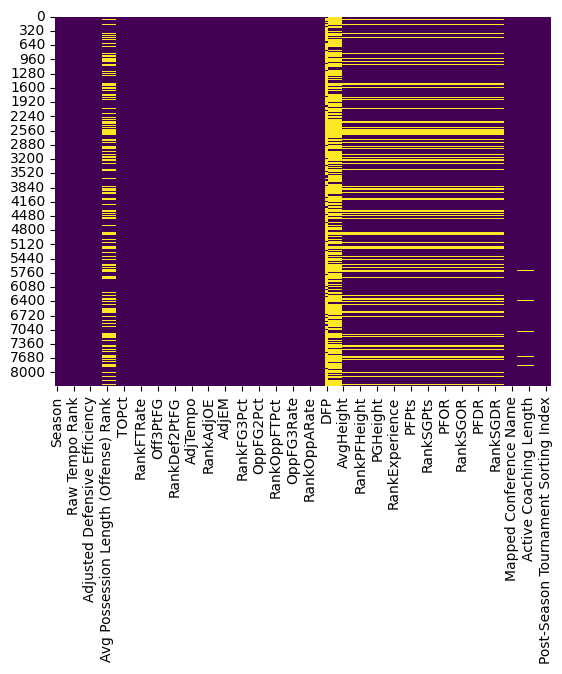

In [1081]:
sns.heatmap(stats.isnull(), cbar=False, cmap='viridis')

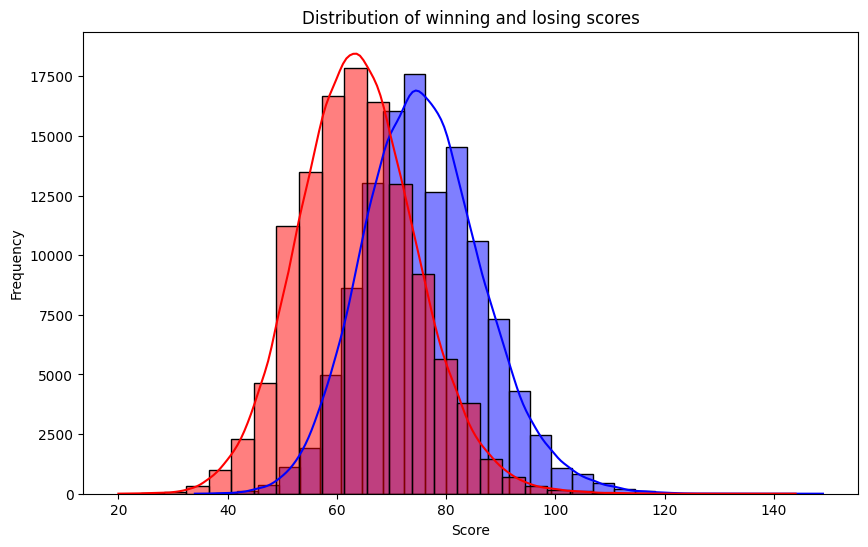

In [1082]:
plt.figure(figsize=(10, 6))
sns.histplot(regular['WScore'], bins=30, kde=True, label='Winning Score', color='blue')
sns.histplot(regular['LScore'], bins=30, kde=True, label='Losing Score', color='red')
plt.title('Distribution of winning and losing scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [1083]:
series = stats['Experience']
mean = series.mean()
print(mean)

def impute_exp(col):
    Experience = col
    if pd.isnull(Experience):
        return mean
    else:
        return Experience

1.7235947863138958


In [1084]:
#apply impution
stats['Experience'] = stats['Experience'].apply(impute_exp)

In [1085]:
stats['Experience'].isnull().sum()

0

In [1086]:
stats['Experience']

0       1.935590
1       0.730000
2       1.540000
3       2.431060
4       2.788170
          ...   
8310    1.723595
8311    1.723595
8312    1.430000
8313    1.021060
8314    1.340000
Name: Experience, Length: 8315, dtype: float64

In [1087]:
points = regular.groupby(['WTeamID', 'Season']).agg({'WScore': ['mean', 'count']})
points.columns = ['Avg_Points_Scored', 'Games_Won']
points['Avg_Points_Allowed'] = regular.groupby(['LTeamID', 'Season'])['LScore'].mean()
points['Games_Lost'] = regular.groupby(['LTeamID', 'Season'])['LScore'].count()
points['Total_Games'] = points['Games_Won'] + points['Games_Lost']
points['Win_Ratio'] = points['Games_Won'] / points['Total_Games']

In [1088]:
points.reset_index(inplace=True)
points

,WTeamID,Season,Avg_Points_Scored,Games_Won,Avg_Points_Allowed,Games_Lost,Total_Games,Win_Ratio
0,1101,2014,80.000000,2,61.368421,19.0,21.0,0.095238
1,1101,2015,77.428571,7,55.523810,21.0,28.0,0.250000
2,1101,2016,78.222222,9,65.666667,18.0,27.0,0.333333
3,1101,2017,74.333333,9,64.250000,16.0,25.0,0.360000
4,1101,2018,76.250000,12,66.200000,15.0,27.0,0.444444
...,...,...,...,...,...,...,...,...
7968,1477,2025,69.200000,5,63.423077,26.0,31.0,0.161290
7969,1478,2024,79.000000,12,63.588235,17.0,29.0,0.413793
7970,1478,2025,75.714286,7,70.954545,22.0,29.0,0.241379
7971,1479,2025,72.750000,12,60.562500,16.0,28.0,0.428571


In [1089]:
team_dict = dict(zip(teams['TeamID'], teams['TeamName']))
points['TeamID'] = points['WTeamID'].map(team_dict)

In [1090]:
massey = massey[massey['RankingDayNum'] == 133]


In [1091]:
points.drop(columns=['WTeamID'], inplace=True)

In [1092]:
points.head(20)

,Season,Avg_Points_Scored,Games_Won,Avg_Points_Allowed,Games_Lost,Total_Games,Win_Ratio,TeamID
0,2014,80.000000,2,61.368421,19.0,21.0,0.095238,Abilene Christian
1,2015,77.428571,7,55.523810,21.0,28.0,0.250000,Abilene Christian
2,2016,78.222222,9,65.666667,18.0,27.0,0.333333,Abilene Christian
3,2017,74.333333,9,64.250000,16.0,25.0,0.360000,Abilene Christian
4,2018,76.250000,12,66.200000,15.0,27.0,0.444444,Abilene Christian
5,2019,73.521739,23,64.833333,6.0,29.0,0.793103,Abilene Christian
6,2020,76.250000,16,67.727273,11.0,27.0,0.592593,Abilene Christian
7,2021,78.947368,19,63.750000,4.0,23.0,0.826087,Abilene Christian
8,2022,77.789474,19,64.400000,10.0,29.0,0.655172,Abilene Christian
9,2023,78.777778,9,67.176471,17.0,26.0,0.346154,Abilene Christian


In [1093]:
stats.head(20)

,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Post-Season Tournament,Post-Season Tournament Sorting Index,Top 12 in AP Top 25 During Week 6?
0,2025,ACC,66.1,253,66.6,259,129.0,2,125.4,1,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes
1,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,1,Midwest,March Madness,1,Yes
2,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,1,West,March Madness,1,Yes
3,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,March Madness,1,Yes
4,2025,SEC,68.1,134,69.3,110,129.9,1,122.3,2,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes
5,2008,B12,66.8,109,68.5,120,120.9,2,116.6,2,...,Bill Self,Kansas Jayhawks,200304.0,21 years,22.0,1,Midwest,March Madness,1,Yes
6,2025,B12,61.2,361,62.1,360,124.0,9,117.3,17,...,Kelvin Sampson,Houston Cougars,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,No
7,2025,SEC,69.6,65,70.6,50,127.0,3,119.5,7,...,Todd Golden,Florida Gators,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,Not In a Post-Season Tournament,5,Yes
8,2019,ACC,59.4,353,60.6,353,123.4,2,116.6,4,...,Ron Sanchez,Virginia Cavaliers,202425.0,0 years,1.0,1,South,March Madness,1,Yes
9,2002,ACC,74.5,8,76.8,9,121.0,1,115.7,2,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,1,South,March Madness,1,Yes


In [1094]:
matchups = []

for _, game in tourney.iterrows():
    season = game['Season']
    w_team = game['WTeamID']
    l_team = game['LTeamID']
    daynum = game['DayNum']
    
    if daynum <= 135:
        round_num = 0
    elif daynum <= 137:
        round_num = 1
    elif daynum <= 139:
        round_num = 2
    elif daynum <= 144:
        round_num = 3 
    elif daynum <= 146:
        round_num = 4
    elif daynum <= 152:
        round_num = 5
    else:
        round_num = 6
    
    w_stats = stats[(stats['Season'] == season) & 
                        (stats['Mapped ESPN Team Name'] == teams[teams['TeamID'] == w_team]['TeamName'].values[0])]
    l_stats = stats[(stats['Season'] == season) & 
                        (stats['Mapped ESPN Team Name'] == teams[teams['TeamID'] == l_team]['TeamName'].values[0])]
    
    w_points = points[(points['Season'] == season) &
                        (points['TeamID'] == teams[teams['TeamID'] == w_team]['TeamName'].values[0])]
    l_points = points[(points['Season'] == season) &
                        (points['TeamID'] == teams[teams['TeamID'] == l_team]['TeamName'].values[0])]
    
    if len(w_stats) == 0 or len(l_stats) == 0 or len(w_points) == 0 or len(l_points) == 0:
        continue
        
    try:
        w_seed = int(seeds[(seeds['Season'] == season) & 
                            (seeds['TeamID'] == w_team)]['Seed'].values[0][1:3])
        l_seed = int(seeds[(seeds['Season'] == season) & 
                            (seeds['TeamID'] == l_team)]['Seed'].values[0][1:3])
    except:
        try:
            w_seed = int(seeds[(seeds['Season'] == season) & 
                                (seeds['TeamID'] == w_team)]['Seed'].values[0][1:3])
        except:
            w_seed = 16
        try:
            l_seed = int(seeds[(seeds['Season'] == season) & 
                                (seeds['TeamID'] == l_team)]['Seed'].values[0][1:3])
        except:
            l_seed = 16
    
    features = {}
    features['Season'] = season
    features['Round'] = round_num
    features['SeedDiff'] = l_seed - w_seed
    
    for col in ['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 
                'Adjusted Temo', 'eFGPct', 'TOPct', 'ORPct', 'FTRate',
                'Experience', 'AdjEM', 'Net Rating', 'Avg_Points_Scored',
                'Games_Won', 'Avg_Points_Allowed', 'Games_Lost', 'Total_Games', 'Win_Ratio']:
        if col in w_stats.columns and col in l_stats.columns:
            features[f'{col}_diff'] = float(w_stats[col].values[0]) - float(l_stats[col].values[0])
        elif col in w_points.columns and col in l_points.columns:
            features[f'{col}_diff'] = float(w_points[col].values[0]) - float(l_points[col].values[0])
    features['Team'] = w_stats["Mapped ESPN Team Name"].values[0]
    features['Opponent'] = l_stats["Mapped ESPN Team Name"].values[0]
    features['result'] = 1
    matchups.append(features)
    
    features_reverse = features.copy()
    for col in features.keys():
        if col.endswith('_diff'):
            features_reverse[col] = -features[col]
    features_reverse['SeedDiff'] = -features['SeedDiff']
    features_reverse['result'] = 0
    features_reverse['Team'] = l_stats["Mapped ESPN Team Name"].values[0]
    features_reverse['Opponent'] = w_stats["Mapped ESPN Team Name"].values[0]
    matchups.append(features_reverse)

matchup_data = pd.DataFrame(matchups)

In [1095]:
matchup_data

,Season,Round,SeedDiff,Adjusted Offensive Efficiency_diff,Adjusted Defensive Efficiency_diff,Adjusted Temo_diff,eFGPct_diff,TOPct_diff,ORPct_diff,FTRate_diff,...,Net Rating_diff,Avg_Points_Scored_diff,Games_Won_diff,Avg_Points_Allowed_diff,Games_Lost_diff,Total_Games_diff,Win_Ratio_diff,Team,Opponent,result
0,2003,1,15,14.5,-10.7,8.3,2.742900,-2.422900,2.230200,2.501100,...,25.2,14.410526,6.0,16.800000,-7.0,-1.0,0.237685,Arizona,Vermont,1
1,2003,1,-15,-14.5,10.7,-8.3,-2.742900,2.422900,-2.230200,-2.501100,...,-25.2,-14.410526,-6.0,-16.800000,7.0,1.0,-0.237685,Vermont,Arizona,0
2,2003,1,-3,3.0,3.3,-1.4,1.957200,0.126500,1.491800,7.491100,...,-0.3,5.896135,-5.0,-5.151515,5.0,0.0,-0.172414,Arizona State,Memphis,1
3,2003,1,3,-3.0,-3.3,1.4,-1.957200,-0.126500,-1.491800,-7.491100,...,0.3,-5.896135,5.0,5.151515,-5.0,-0.0,0.172414,Memphis,Arizona State,0
4,2003,1,1,-1.3,-1.8,0.9,-1.044500,-1.314400,0.599700,-5.226700,...,0.5,-1.793651,3.0,6.083333,-4.0,-1.0,0.124138,California,NC State,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,2024,5,-3,-1.5,11.9,8.0,-0.594558,1.418475,-1.783214,3.379628,...,-13.4,12.425499,-10.0,17.787879,8.0,-2.0,-0.255515,Alabama,UConn,0
2310,2024,5,10,10.9,-3.8,-1.0,5.084930,2.647674,9.503547,9.307765,...,14.7,3.731975,7.0,6.428571,-10.0,-3.0,0.267677,Purdue,NC State,1
2311,2024,5,-10,-10.9,3.8,1.0,-5.084930,-2.647674,-9.503547,-9.307765,...,-14.7,-3.731975,-7.0,-6.428571,10.0,3.0,-0.267677,NC State,Purdue,0
2312,2024,6,0,2.3,-3.5,-2.4,1.097619,-1.943160,-0.960262,-9.346048,...,5.8,-1.220245,2.0,-12.333333,-1.0,1.0,0.032977,UConn,Purdue,1


In [1096]:
print(matchup_data['Experience_diff'])

0       0.00000
1      -0.00000
2       0.00000
3      -0.00000
4       0.00000
         ...   
2309    0.05938
2310   -0.60959
2311    0.60959
2312   -0.01193
2313    0.01193
Name: Experience_diff, Length: 2314, dtype: float64


In [1097]:
features = [col for col in matchup_data.columns if col not in ['Season', 'result', 'Team', 'Opponent']]
X = matchup_data[features]
y = matchup_data['result']

In [1098]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [1099]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1100]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(X_train_scaled, y_train):
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

In [1101]:
model = xgb.XGBClassifier(
    learning_rate=0.005,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=3,
    subsample=0.65,
    colsample_bytree=0.8,
    reg_alpha=0.05,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42,
)

model.fit(
    X_tr, 
    y_tr,
    eval_set=[(X_val, y_val)]
)

[0]	validation_0-logloss:0.69143
[1]	validation_0-logloss:0.68986
[2]	validation_0-logloss:0.68809
[3]	validation_0-logloss:0.68644
[4]	validation_0-logloss:0.68488
[5]	validation_0-logloss:0.68316
[6]	validation_0-logloss:0.68161
[7]	validation_0-logloss:0.68001
[8]	validation_0-logloss:0.67846
[9]	validation_0-logloss:0.67696
[10]	validation_0-logloss:0.67547
[11]	validation_0-logloss:0.67404
[12]	validation_0-logloss:0.67242
[13]	validation_0-logloss:0.67096
[14]	validation_0-logloss:0.66941
[15]	validation_0-logloss:0.66798
[16]	validation_0-logloss:0.66657
[17]	validation_0-logloss:0.66512
[18]	validation_0-logloss:0.66371
[19]	validation_0-logloss:0.66229
[20]	validation_0-logloss:0.66092
[21]	validation_0-logloss:0.65946
[22]	validation_0-logloss:0.65811
[23]	validation_0-logloss:0.65684
[24]	validation_0-logloss:0.65550
[25]	validation_0-logloss:0.65417
[26]	validation_0-logloss:0.65280
[27]	validation_0-logloss:0.65146
[28]	validation_0-logloss:0.65024
[29]	validation_0-loglos

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Log Loss: 0.505006830027331
Accuracy: 0.7235421166306696


<Figure size 1200x800 with 0 Axes>

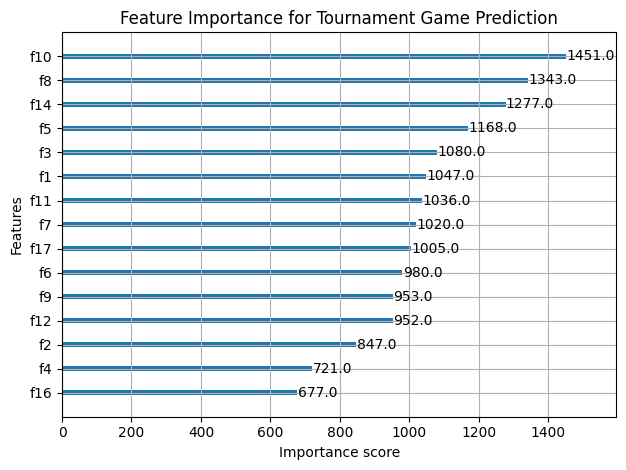

In [ ]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(model, max_num_features=15, importance_type='weight', title='Feature Importance')
plt.title('Feature Importance for Tournament Game Prediction')
plt.tight_layout()
plt.show()

Input 2 teams for simulation game and two seeds

Simulate a game

In [ ]:
def extract_sim_features(team_a_name, team_b_name, team_a_seed, team_b_seed, round_num, season, stats, points, scaler):
    team_a_stats = stats[stats['Mapped ESPN Team Name'] == team_a_name]
    team_b_stats = stats[stats['Mapped ESPN Team Name'] == team_b_name]

    if len(team_a_stats) == 0 or len(team_b_stats) == 0:
        raise ValueError(f"Could not find stats for one or both teams: {team_a_name}, {team_b_name}")

    features = {}
    features['Round'] = round_num
    features['SeedDiff'] = team_b_seed - team_a_seed

    a_seasons = team_a_stats["Season"].values.tolist()
    b_seasons = team_b_stats["Season"].values.tolist()
    a_szn_index = 0
    for i, szn in enumerate(a_seasons):
        if szn == 2025:
            a_szn_index = i
    b_szn_index = 0
    for i, szn in enumerate(b_seasons):
        if szn == 2025:
            b_szn_index = i

    team_a_points = points[(points['Season'] == season) &
                            (points['TeamID'] == team_a_name)]
    team_b_points = points[(points['Season'] == season) &
                            (points['TeamID'] == team_b_name)]
    a_points_seasons = team_a_points["Season"].values.tolist()
    b_points_seasons = team_b_points["Season"].values.tolist()
    a_pt_szn_index = 0
    for i, szn in enumerate(a_points_seasons):
        if szn == 2025:
            a_pt_szn_index = i
    b_pt_szn_index = 0
    for i, szn in enumerate(b_points_seasons):
        if szn == 2025:
            b_pt_szn_index = i

    for col in ['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 
                'Adjusted Temo', 'eFGPct', 'TOPct', 'ORPct', 'FTRate',
                'Experience', 'AdjEM', 'Net Rating', 'Avg_Points_Scored',
                    'Games_Won', 'Avg_Points_Allowed', 'Games_Lost', 'Total_Games', 'Win_Ratio']:
        if col in team_a_stats.columns and col in team_b_stats.columns:
            features[f'{col}_diff'] = float(team_a_stats[col].values[a_szn_index]) - float(team_b_stats[col].values[b_szn_index])
        elif col in team_a_points.columns and col in team_b_points.columns:
            features[f'{col}_diff'] = float(team_a_points[col].values[a_pt_szn_index]) - float(team_b_points[col].values[b_pt_szn_index])

    matchup_features = pd.DataFrame([features])
    matchup_features_scaled = scaler.transform(matchup_features)
    return matchup_features, matchup_features_scaled

In [ ]:
test_team_a_name = "Duke"
test_team_b_name = "Kentucky"
test_team_a_seed = 1
test_team_b_seed = 9
test_round_num = 2

In [ ]:
matchup_features_df, matchup_features_scaled_test = extract_sim_features(test_team_a_name, test_team_b_name, test_team_a_seed, test_team_b_seed, test_round_num, 2025, stats, points, scaler)

<Axes: >

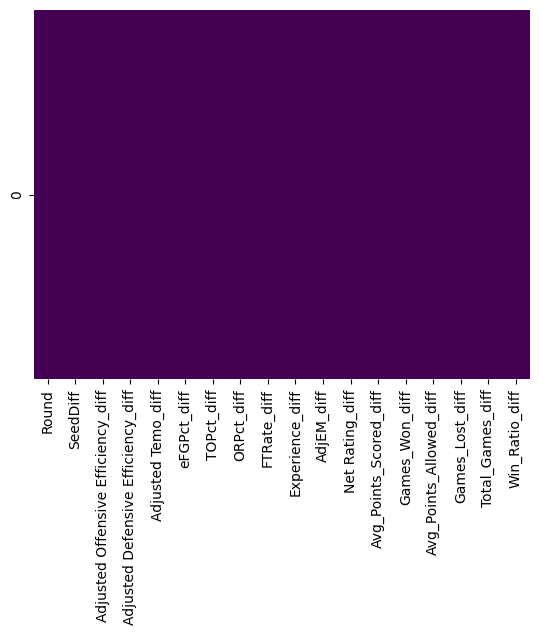

In [ ]:
sns.heatmap(matchup_features_df.isnull(), cbar=False, cmap='viridis')

In [ ]:
matchup_features_df

,Round,SeedDiff,Adjusted Offensive Efficiency_diff,Adjusted Defensive Efficiency_diff,Adjusted Temo_diff,eFGPct_diff,TOPct_diff,ORPct_diff,FTRate_diff,Experience_diff,AdjEM_diff,Net Rating_diff,Avg_Points_Scored_diff,Games_Won_diff,Avg_Points_Allowed_diff,Games_Lost_diff,Total_Games_diff,Win_Ratio_diff
0,2,8,3.6,-10.5,-4.8,1.502449,-0.72824,6.363565,-3.584344,-1.14733,14.1057,14.1,-5.235185,7.0,-5.133333,-7.0,0.0,0.233333


In [ ]:
matchup_features_scaled_test

array([[ 0.04439965,  1.13518505,  0.4539658 , -1.53200089, -1.1336902 ,
         0.39963816, -0.28649453,  1.17010152, -0.57945305, -2.11328059,
         1.1969427 ,  1.19657316, -0.75426172,  1.41215178, -0.64287239,
        -1.6454094 ,  0.00349915,  1.72556392]])

In [ ]:
def simulate_game(team_a_name, team_b_name, team_a_seed, team_b_seed, round_num, season, stats, points, scaler, model):
    features_df, features = extract_sim_features(team_a_name, team_b_name, team_a_seed, team_b_seed, round_num, season, stats, points, scaler)
    team_a_win_prob = model.predict_proba(features)[0, 1]
    team_b_win_prob = 1 - team_a_win_prob
    num_simulations = 10000
    simulation_results = np.random.binomial(n=1, p=team_a_win_prob, size=num_simulations)
    team_a_win_count = np.sum(simulation_results)
    team_b_win_count = num_simulations - team_a_win_count

    team_a_sim_win_pct = team_a_win_count / num_simulations
    team_b_sim_win_pct = team_b_win_count / num_simulations

    result = {
        'team_a': {
            'name': team_a_name,
            'seed': team_a_seed,
            'win_probability': round(team_a_win_prob, 5),
            'simulated_win_pct': round(team_a_sim_win_pct, 5)
        },
        'team_b': {
            'name': team_b_name,
            'seed': team_b_seed,
            'win_probability': round(team_b_win_prob, 5),
            'simulated_win_pct': round(team_b_sim_win_pct, 5)
        },
        'predicted_winner': team_a_name if team_a_win_prob > 0.5 else team_b_name,
        'round': round_num,
    }
    return result


In [ ]:
test_result = simulate_game(test_team_a_name, test_team_b_name, test_team_a_seed, test_team_b_seed, test_round_num, 2025, stats, points, scaler, model)

In [ ]:
print(f"\n----- {test_team_a_name} vs {test_team_b_name} -----")
print(f"Round: {round_num}")
print(f"{test_team_a_name} (Seed {test_team_a_seed}): {test_result['team_a']['win_probability']:.1%} win probability, won in {test_result['team_a']['simulated_win_pct']:.2%} of simulations")
print(f"{test_team_b_name} (Seed {test_team_b_seed}): {test_result['team_b']['win_probability']:.1%} win probability, won in {test_result['team_b']['simulated_win_pct']:.2%} of simulations")
print(f"Predicted Winner: {test_result['predicted_winner']}")


----- Duke vs Kentucky -----
Round: 6
Duke (Seed 1): 88.8% win probability, won in 87.98% of simulations
Kentucky (Seed 9): 11.2% win probability, won in 12.02% of simulations
Predicted Winner: Duke


Running Sims on 2025 Tournament

In [ ]:
bracket = pd.read_csv('bracket2025.csv')
bracket

,teamId,conference,seed
0,1181,W,01
1,1104,W,02
2,1458,W,03
3,1112,W,04
4,1332,W,05
...,...,...,...
63,1161,Z,12
64,1213,Z,13
65,1423,Z,14
66,1303,Z,15


In [ ]:
bracket['name'] = bracket['teamId'].map(team_dict)
bracket

,teamId,conference,seed,name
0,1181,W,01,Duke
1,1104,W,02,Alabama
2,1458,W,03,Wisconsin
3,1112,W,04,Arizona
4,1332,W,05,Oregon
...,...,...,...,...
63,1161,Z,12,Colorado State
64,1213,Z,13,Grand Canyon
65,1423,Z,14,UNC Wilmington
66,1303,Z,15,Omaha


In [ ]:
# simulate play-in games
play_in_teams = bracket[bracket['seed'].str.contains('a') | bracket['seed'].str.contains('b')]
play_in_teams

,teamId,conference,seed,name
15,1110,W,16a,American University
16,1291,W,16b,Mount St. Mary's
27,1400,X,11a,Texas
28,1462,X,11b,Xavier
44,1314,Y,11a,North Carolina
45,1361,Y,11b,San Diego State
50,1106,Y,16a,Alabama State
51,1384,Y,16b,St. Francis (PA)


In [ ]:
play_in_results = []
for i in range(len(play_in_teams) // 2):
    team_a_name = play_in_teams.iloc[i * 2]['name']
    team_b_name = play_in_teams.iloc[i * 2 + 1]['name']
    team_a_seed = int(play_in_teams.iloc[i * 2]['seed'][:-1])
    team_b_seed = int(play_in_teams.iloc[i * 2 + 1]['seed'][:-1])
    result = simulate_game(team_a_name, team_b_name, team_a_seed, team_b_seed, 0, 2025, stats, points, scaler, model)
    play_in_results.append(result)
play_in_results

[{'team_a': {'name': 'American University',
   'seed': 16,
   'win_probability': 0.7368,
   'simulated_win_pct': 0.7293},
  'team_b': {'name': "Mount St. Mary's",
   'seed': 16,
   'win_probability': 0.2632,
   'simulated_win_pct': 0.2707},
  'predicted_winner': 'American University',
  'round': 0},
 {'team_a': {'name': 'Texas',
   'seed': 11,
   'win_probability': 0.6129,
   'simulated_win_pct': 0.6049},
  'team_b': {'name': 'Xavier',
   'seed': 11,
   'win_probability': 0.3871,
   'simulated_win_pct': 0.3951},
  'predicted_winner': 'Texas',
  'round': 0},
 {'team_a': {'name': 'North Carolina',
   'seed': 11,
   'win_probability': 0.61403,
   'simulated_win_pct': 0.6225},
  'team_b': {'name': 'San Diego State',
   'seed': 11,
   'win_probability': 0.38597,
   'simulated_win_pct': 0.3775},
  'predicted_winner': 'North Carolina',
  'round': 0},
 {'team_a': {'name': 'Alabama State',
   'seed': 16,
   'win_probability': 0.70019,
   'simulated_win_pct': 0.7058},
  'team_b': {'name': 'St. F

In [ ]:
play_in_winners_updated = []
for result in play_in_results:
    play_in_winners_updated.append(result['predicted_winner'])
play_in_winners_updated

['American University', 'Texas', 'North Carolina', 'Alabama State']

In [ ]:
for team in play_in_teams['name']:
    if team in play_in_winners_updated:
        bracket.loc[bracket['name'] == team, 'seed'] = bracket.loc[bracket['name'] == team, 'seed'].astype(str).str[:2]
    else:
        bracket.drop(bracket[bracket['name'] == team].index, inplace=True)
bracket.head(20)

,teamId,conference,seed,name
0,1181,W,01,Duke
1,1104,W,02,Alabama
2,1458,W,03,Wisconsin
3,1112,W,04,Arizona
4,1332,W,05,Oregon
5,1140,W,06,BYU
6,1388,W,07,Saint Mary's
7,1280,W,08,Mississippi State
8,1124,W,09,Baylor
9,1435,W,10,Vanderbilt


In [ ]:
bracket.reset_index(drop=True, inplace=True)
bracket.index += 1
bracket.head(20)

,teamId,conference,seed,name
1,1181,W,01,Duke
2,1104,W,02,Alabama
3,1458,W,03,Wisconsin
4,1112,W,04,Arizona
5,1332,W,05,Oregon
6,1140,W,06,BYU
7,1388,W,07,Saint Mary's
8,1280,W,08,Mississippi State
9,1124,W,09,Baylor
10,1435,W,10,Vanderbilt


In [ ]:
first_round_matchups = []
num_teams = len(bracket)
matchups_per_region = num_teams // 4

for region_start in range(0, num_teams, matchups_per_region):
    for i in range(matchups_per_region // 2):
        team_a_index = region_start + i
        team_b_index = region_start + (matchups_per_region - 1 - i)

        team_a_name = bracket.iloc[team_a_index]['name']
        team_b_name = bracket.iloc[team_b_index]['name']
        team_a_seed = int(bracket.iloc[team_a_index]['seed'])
        team_b_seed = int(bracket.iloc[team_b_index]['seed'])

        matchup = {
            "team_a": team_a_name,
            "team_b": team_b_name,
            "team_a_seed": team_a_seed,
            "team_b_seed": team_b_seed,
            "round": 1
        }
        first_round_matchups.append(matchup)
first_round_matchups

[{'team_a': 'Duke',
  'team_b': 'American University',
  'team_a_seed': 1,
  'team_b_seed': 16,
  'round': 1},
 {'team_a': 'Alabama',
  'team_b': 'Robert Morris',
  'team_a_seed': 2,
  'team_b_seed': 15,
  'round': 1},
 {'team_a': 'Wisconsin',
  'team_b': 'Montana',
  'team_a_seed': 3,
  'team_b_seed': 14,
  'round': 1},
 {'team_a': 'Arizona',
  'team_b': 'Akron',
  'team_a_seed': 4,
  'team_b_seed': 13,
  'round': 1},
 {'team_a': 'Oregon',
  'team_b': 'Liberty',
  'team_a_seed': 5,
  'team_b_seed': 12,
  'round': 1},
 {'team_a': 'BYU',
  'team_b': 'VCU',
  'team_a_seed': 6,
  'team_b_seed': 11,
  'round': 1},
 {'team_a': "Saint Mary's",
  'team_b': 'Vanderbilt',
  'team_a_seed': 7,
  'team_b_seed': 10,
  'round': 1},
 {'team_a': 'Mississippi State',
  'team_b': 'Baylor',
  'team_a_seed': 8,
  'team_b_seed': 9,
  'round': 1},
 {'team_a': 'Houston',
  'team_b': 'SIU Edwardsville',
  'team_a_seed': 1,
  'team_b_seed': 16,
  'round': 1},
 {'team_a': 'Tennessee',
  'team_b': 'Wofford',
  '

In [ ]:
def sort_matchups(matchups):
    correct_order = [1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15]
    return sorted(matchups, key=lambda matchup: (correct_order.index(matchup['team_a_seed']), correct_order.index(matchup['team_b_seed'])))

In [ ]:
div1_matchups = sort_matchups(first_round_matchups[0:8])
div2_matchups = sort_matchups(first_round_matchups[8:16])
div3_matchups = sort_matchups(first_round_matchups[16:24])
div4_matchups = sort_matchups(first_round_matchups[24:32])
first_round_matchups_sorted = div1_matchups + div2_matchups + div3_matchups + div4_matchups
first_round_matchups_sorted

[{'team_a': 'Duke',
  'team_b': 'American University',
  'team_a_seed': 1,
  'team_b_seed': 16,
  'round': 1},
 {'team_a': 'Mississippi State',
  'team_b': 'Baylor',
  'team_a_seed': 8,
  'team_b_seed': 9,
  'round': 1},
 {'team_a': 'Oregon',
  'team_b': 'Liberty',
  'team_a_seed': 5,
  'team_b_seed': 12,
  'round': 1},
 {'team_a': 'Arizona',
  'team_b': 'Akron',
  'team_a_seed': 4,
  'team_b_seed': 13,
  'round': 1},
 {'team_a': 'BYU',
  'team_b': 'VCU',
  'team_a_seed': 6,
  'team_b_seed': 11,
  'round': 1},
 {'team_a': 'Wisconsin',
  'team_b': 'Montana',
  'team_a_seed': 3,
  'team_b_seed': 14,
  'round': 1},
 {'team_a': "Saint Mary's",
  'team_b': 'Vanderbilt',
  'team_a_seed': 7,
  'team_b_seed': 10,
  'round': 1},
 {'team_a': 'Alabama',
  'team_b': 'Robert Morris',
  'team_a_seed': 2,
  'team_b_seed': 15,
  'round': 1},
 {'team_a': 'Houston',
  'team_b': 'SIU Edwardsville',
  'team_a_seed': 1,
  'team_b_seed': 16,
  'round': 1},
 {'team_a': 'Gonzaga',
  'team_b': 'Georgia',
  'te

In [ ]:
def simulate_bracket(bracket_matchups, stats, points, scaler, model):
    winners = []
    results = {"rounds": {}}
    current_round = 1
    current_matchups = bracket_matchups
    champ_match = None
    
    while len(current_matchups) > 0:
        round_results = []
        next_round_matchups = []
        
        for i, matchup in enumerate(current_matchups):
            result = simulate_game(matchup["team_a"], matchup["team_b"], matchup["team_a_seed"], matchup["team_b_seed"], current_round, 2025, stats, points, scaler, model)
            round_results.append(result)
            
            if current_round < 6:
                winner = result["predicted_winner"]
                winner_seed = matchup["team_a_seed"] if winner == matchup["team_a"] else matchup["team_b_seed"]
                
                winners.append({
                    "winner": winner,
                    "matchup": matchup
                })

                if i % 2 == 0:
                    temp_winner = {"team": winner, "seed": winner_seed}
                else:
                    prev_winner = temp_winner
                    next_round_matchups.append({
                        "team_a": prev_winner["team"],
                        "team_b": winner,
                        "team_a_seed": prev_winner["seed"],
                        "team_b_seed": winner_seed,
                        "round": current_round + 1
                    })
        
        results["rounds"][f"Round_{current_round}"] = round_results
        
        current_round += 1
        if len(current_matchups) == 1:
            champ_match = current_matchups[0]
        current_matchups = next_round_matchups
        
        if len(current_matchups) == 0:
            break
    
    final_round = max([int(k.split('_')[1]) for k in results["rounds"].keys()])
    championship = results["rounds"][f"Round_{final_round}"][0]
    results["champion"] = championship["predicted_winner"]
    winners.append({"winner": championship["predicted_winner"], "matchup": champ_match})
    
    return results, winners

In [ ]:
results, winners = simulate_bracket(first_round_matchups_sorted, stats, points, scaler, model)

In [ ]:
results

{'rounds': {'Round_1': [{'team_a': {'name': 'Duke',
     'seed': 1,
     'win_probability': 0.95095,
     'simulated_win_pct': 0.9492},
    'team_b': {'name': 'American University',
     'seed': 16,
     'win_probability': 0.04905,
     'simulated_win_pct': 0.0508},
    'predicted_winner': 'Duke',
    'round': 1},
   {'team_a': {'name': 'Alabama',
     'seed': 2,
     'win_probability': 0.8192,
     'simulated_win_pct': 0.8225},
    'team_b': {'name': 'Robert Morris',
     'seed': 15,
     'win_probability': 0.1808,
     'simulated_win_pct': 0.1775},
    'predicted_winner': 'Alabama',
    'round': 1},
   {'team_a': {'name': 'Wisconsin',
     'seed': 3,
     'win_probability': 0.967,
     'simulated_win_pct': 0.9667},
    'team_b': {'name': 'Montana',
     'seed': 14,
     'win_probability': 0.033,
     'simulated_win_pct': 0.0333},
    'predicted_winner': 'Wisconsin',
    'round': 1},
   {'team_a': {'name': 'Arizona',
     'seed': 4,
     'win_probability': 0.88576,
     'simulated_win

In [ ]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.float32):
            return float(obj)
        return super().default(obj)

with open('results.json', 'w') as f:
    json.dump(results, f, cls=NumpyEncoder)


In [ ]:
winners

[{'winner': 'Duke',
  'matchup': {'team_a': 'Duke',
   'team_b': 'American University',
   'team_a_seed': 1,
   'team_b_seed': 16,
   'round': 1}},
 {'winner': 'Alabama',
  'matchup': {'team_a': 'Alabama',
   'team_b': 'Robert Morris',
   'team_a_seed': 2,
   'team_b_seed': 15,
   'round': 1}},
 {'winner': 'Wisconsin',
  'matchup': {'team_a': 'Wisconsin',
   'team_b': 'Montana',
   'team_a_seed': 3,
   'team_b_seed': 14,
   'round': 1}},
 {'winner': 'Arizona',
  'matchup': {'team_a': 'Arizona',
   'team_b': 'Akron',
   'team_a_seed': 4,
   'team_b_seed': 13,
   'round': 1}},
 {'winner': 'Oregon',
  'matchup': {'team_a': 'Oregon',
   'team_b': 'Liberty',
   'team_a_seed': 5,
   'team_b_seed': 12,
   'round': 1}},
 {'winner': 'VCU',
  'matchup': {'team_a': 'BYU',
   'team_b': 'VCU',
   'team_a_seed': 6,
   'team_b_seed': 11,
   'round': 1}},
 {'winner': "Saint Mary's",
  'matchup': {'team_a': "Saint Mary's",
   'team_b': 'Vanderbilt',
   'team_a_seed': 7,
   'team_b_seed': 10,
   'round'

In [ ]:
winners_df = pd.DataFrame(winners)
winners_df

,winner,matchup
0,Duke,"{'team_a': 'Duke', 'team_b': 'American Univers..."
1,Alabama,"{'team_a': 'Alabama', 'team_b': 'Robert Morris..."
2,Wisconsin,"{'team_a': 'Wisconsin', 'team_b': 'Montana', '..."
3,Arizona,"{'team_a': 'Arizona', 'team_b': 'Akron', 'team..."
4,Oregon,"{'team_a': 'Oregon', 'team_b': 'Liberty', 'tea..."
...,...,...
58,Auburn,"{'team_a': 'Auburn', 'team_b': 'Louisville', '..."
59,Florida,"{'team_a': 'Florida', 'team_b': 'Missouri', 't..."
60,Houston,"{'team_a': 'Duke', 'team_b': 'Houston', 'team_..."
61,Auburn,"{'team_a': 'Auburn', 'team_b': 'Florida', 'tea..."


In [ ]:
winners_df.to_csv('winners.csv', index=False)

Competition Submission for Kaggle March ML Mania Comp

In [ ]:
def generate_submission(model, stats, points, scaler, seeds, output_path='submission.csv'):
    tourney_teams = teams['TeamID'].unique()
    matchups = list(combinations(tourney_teams, 2))
    submission_data = []
    for team1, team2 in matchups:
        if team1 < team2:
            matchup_id = f"2025_{team1}_{team2}"
        else:
            matchup_id = f"2025_{team2}_{team1}"
        
        team1_name = teams[teams['TeamID'] == team1]['TeamName'].values[0]
        team2_name = teams[teams['TeamID'] == team2]['TeamName'].values[0]
        # team1_seed = int(seeds[(seeds['Season'] == 2025) & (seeds['TeamID'] == team1)]['Seed'].values[0][1:3])
        # team2_seed = int(seeds[(seeds['Season'] == 2025) & (seeds['TeamID'] == team2)]['Seed'].values[0][1:3])
        def get_seed(team_id):
            try:
                seed_str = seeds[seeds['TeamID'] == team_id]['Seed'].values
                return int(seed_str[0][1:3]) if len(seed_str) > 0 else 16
            except:
                return 16
        
        team1_seed = get_seed(team1)
        team2_seed = get_seed(team2)
        
        if team1_name not in stats['Mapped ESPN Team Name'].values or team2_name not in stats['Mapped ESPN Team Name'].values:
            submission_data.append({
                'ID': matchup_id,
                'Pred': 0.5
            })
            continue
        result = simulate_game(team1_name, team2_name, team1_seed, team2_seed, 1, 2025, stats, points, scaler, model)
        submission_data.append({
            'ID': matchup_id,
            'Pred': result['team_a']['win_probability']
        })
    submission_df = pd.DataFrame(submission_data)
    submission_df.to_csv(output_path, index=False)
    return submission_df

In [ ]:
generate_submission(model, stats, points, scaler, seeds, output_path='submission.csv')